## Applied Statistics - Autumn 2024/25

##### Liliana Pereira - G00411560

### Task 1: Permutations and Combinations

#### Problem Statement
This task extends the classical "Lady Tasting Tea" experiment by evaluating the likelihood of success through random guessing in a modified setup. The experiment involves:
- 12 cups of tea, where 6 cups have milk poured first and the other 6 have tea poured first.
- A participant claims the ability to distinguish the cups with milk poured first.

We aim to compute the probabilities for the following scenarios:
1. **Selecting exactly 6 correct cups.**
2. **Selecting at least 5 correct cups (allowing at most one error).**
3. **Selecting at least 4 correct cups (allowing at most two errors).**

Finally, the results will be visualized and analyzed to assess the reliability of accepting errors.

### Table of Contents
1. **Introduction**: Background and relevance.
2. **Importing Libraries**: Required tools for computation and visualization.
3. **Mathematical Setup**: Overview of combinations.
4. **Probability Calculations**: Step-by-step computation for each scenario.
5. **Visualization**: Bar chart illustrating the distribution of correct guesses.
6. **Results and Analysis**: Key findings and their implications.
7. **References**: Supporting resources.

### 1. Introduction
The "Lady Tasting Tea" experiment, devised by Ronald Fisher, is a cornerstone of hypothesis testing. This task adapts the experiment to calculate probabilities using combinatorics, highlighting the role of chance in experimental outcomes. Through Python-based tools, we delve into the likelihood of identifying the correct cups by random guessing, offering a practical demonstration of statistical concepts.

### 2. Importing Required Libraries
We begin by importing essential libraries for calculations and visualizations.

In [1]:
import math  
import numpy as np  
import matplotlib.pyplot as plt 
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import random
import itertools
import warnings
import statistics

### 3. Mathematical Setup

The total number of ways to select \( k \) cups from \( n \) is computed using combinations:

$$
\binom{n}{k} = \frac{n!}{k!(n-k)!}
$$


This formula will be used to determine the likelihood of different guessing scenarios.

### 4. Probability Calculations

#### 4.1 Probability of Exactly 6 Correct Cups

In this scenario, the participant guesses all 6 cups with milk correctly. The probability is calculated as:

In [2]:
# P(6 correct) = 1 / C(12, 6)

In [3]:
# Total number of ways to choose 6 cups out of 12
no_cups_total = 12
no_cups_milk_first = 6

In [4]:
# Total combinations
total_combinations = math.comb(no_cups_total, no_cups_milk_first)

In [5]:
# Probability of guessing all 6 correctly
p_exactly_six = 1 / total_combinations
print(f"Probability of selecting exactly 6 correct cups: {p_exactly_six:.4f}")

Probability of selecting exactly 6 correct cups: 0.0011


#### 4.2 Probability of At Most One Error (5 or 6 Correct Cups)
For this scenario, we consider two cases:
1. **Exactly 5 correct cups**: Choose 5 correct cups from the 6 with milk and 1 incorrect cup from the 6 with tea.
2. **Exactly 6 correct cups**: Already calculated above.

The probability is:

$$
P(\text{at most one error}) = P(5 \text{ correct}) + P(6 \text{ correct})
$$

In [6]:
# Combinations for exactly 5 correct cups
ways_5_correct = math.comb(6, 5) * math.comb(6, 1)

In [7]:
# Probability of exactly 5 correct cups
p_exactly_five = ways_5_correct / total_combinations

In [8]:
# Total probability of at most one error (5 or 6 correct cups)
p_at_most_one_error = p_exactly_five + p_exactly_six
print(f"Probability of making at most one error (5 or 6 correct cups): {p_at_most_one_error:.4f}")

Probability of making at most one error (5 or 6 correct cups): 0.0400


#### 4.3 Probability of At Most Two Errors (4, 5, or 6 Correct Cups)
For this scenario, we include:
- **Exactly 4 correct cups**: Choose 4 correct cups from the 6 with milk and 2 incorrect cups from the 6 with tea.
- **Exactly 5 correct cups**: Already calculated.
- **Exactly 6 correct cups**: Already calculated.

The probability is:

$$
P(\text{at most two errors}) = P(4 \text{ correct}) + P(5 \text{ correct}) + P(6 \text{ correct})
$$

In [9]:
# Combinations for exactly 4 correct cups
ways_4_correct = math.comb(6, 4) * math.comb(6, 2)

In [10]:
# Probability of exactly 4 correct cups
p_exactly_four = ways_4_correct / total_combinations

In [11]:
# Total probability of at most two errors
p_at_most_two_error = p_exactly_four + p_exactly_five + p_exactly_six
print(f"Probability of making at most two errors (4, 5, or 6 correct cups): {p_at_most_two_error:.4f}")

Probability of making at most two errors (4, 5, or 6 correct cups): 0.2835


### 5. Visualization
We calculate the probabilities for 0 to 6 correct guesses and present them as a bar chart.

In [12]:
# Calculate probabilities for 0 to 6 correct guesses
probabilities = []
for correct in range(7):
    incorrect = 6 - correct
    ways = math.comb(6, correct) * math.comb(6, incorrect)
    probabilities.append(ways / total_combinations)

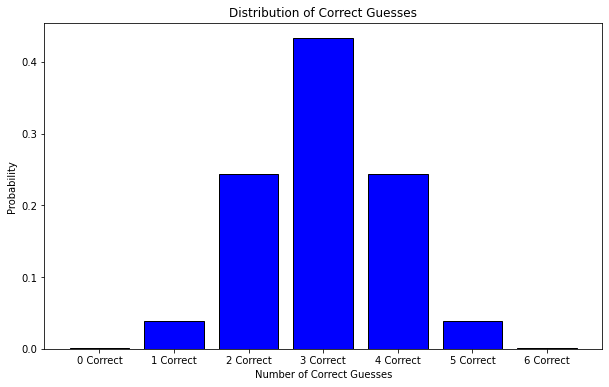

In [13]:
# Plot the distribution
labels = [f"{i} Correct" for i in range(7)]
plt.figure(figsize=(10, 6))
plt.bar(labels, probabilities, color='blue', edgecolor='black')
plt.xlabel("Number of Correct Guesses")
plt.ylabel("Probability")
plt.title("Distribution of Correct Guesses")
plt.show()

### 6. Results and Analysis

1. **Probability of selecting all 6 cups correctly**: \(0.0011\) (1 in 924).
2. **Probability of at most one error (5 or 6 correct cups)**: \(0.0400\) (about 4%).
3. **Probability of at most two errors (4, 5, or 6 correct cups)**: \(0.2835\) (about 28%).

Accepting two errors significantly increases the probability of success by chance, undermining the test's reliability. Allowing only one error is more statistically sound for maintaining the validity of the claim.

### 7. References
1. Python Documentation: [math.comb()](https://docs.python.org/3/library/math.html)
2. Matplotlib Documentation: [Bar Plot](https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html)
3. Wikipedia: [Lady Tasting Tea Experiment](https://en.wikipedia.org/wiki/Lady_tasting_tea)
4. Stack Overflow: [Python Probability Calculations](https://stackoverflow.com/questions/tagged/python)
5. Statistics Easily: [Lady Tasting Tea](https://statisticseasily.com/lady-tasting-tea/)

### Task 2: numpy's Normal Distribution

#### Problem Statement
In this task, we assess whether the `numpy.random.normal()` function properly generates normally distributed values. The steps involved are:
1. Generate a sample of 100,000 values using `numpy.random.normal()` with a mean of 10.0 and a standard deviation of 3.0.
2. Use the `scipy.stats.shapiro()` function to test if the sample comes from a normal distribution.
3. Visualize the distribution of the generated values by:
   - Plotting a histogram.
   - Overlaying the probability density function (PDF) of the corresponding normal distribution.

This analysis will help us evaluate the correctness of `numpy.random.normal()` in producing normal values.


### Table of Contents
1. **Introduction**: Background and relevance.
2. **Importing Libraries**: Tools required for computation and visualization.
3. **Data Generation**: Creating a dataset using `numpy.random.normal()`.
4. **Normality Test**: Applying the Shapiro-Wilk test.
5. **Visualization**: Histogram and probability density function.
6. **Results and Analysis**: Key findings and insights.
7. **References**: Supporting resources.

### 1. Introduction
Random number generation is a fundamental concept in statistical analysis and simulations. Normal distributions are among the most widely used distributions in probability and statistics. This task explores the functionality of `numpy.random.normal()` to verify whether it generates normal distributions with the specified mean and standard deviation.

### 2. Importing Required Libraries

In [14]:
import numpy as np  
import scipy.stats as stats 
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

### 3. Data Generation

We generate a sample of 100,000 values with:
- **Mean**: 10.0
- **Standard Deviation**: 3.0

In [15]:
# Parameters for the normal distribution
mean = 10.0
std_dev = 3.0
sample_size = 100000

In [16]:
# Generate the sample data
sample_data = np.random.normal(loc=mean, scale=std_dev, size=sample_size)

In [17]:
# Display basic statistics
print(f"Sample Mean: {np.mean(sample_data):.4f}")
print(f"Sample Standard Deviation: {np.std(sample_data):.4f}")

Sample Mean: 9.9988
Sample Standard Deviation: 2.9964


### 4. Normality Test

The Shapiro-Wilk test checks if the data comes from a normal distribution. The null hypothesis (\(H_0\)) states that the data is normally distributed. If the p-value is greater than 0.05, we fail to reject \(H_0\).


In [18]:
# Perform the Shapiro-Wilk test
shapiro_test = stats.shapiro(sample_data[:5000])  # Use a subset of 5000 values for Shapiro-Wilk test due to size limits

In [19]:
# Display test results
print("Shapiro-Wilk Test Results:")
print(f"Test Statistic: {shapiro_test.statistic:.6f}")
print(f"p-value: {shapiro_test.pvalue:.6f}")

Shapiro-Wilk Test Results:
Test Statistic: 0.999480
p-value: 0.184142


In [20]:
# Interpret the results
if shapiro_test.pvalue > 0.05:
    print("The data likely comes from a normal distribution (fail to reject H0).")
else:
    print("The data does not likely come from a normal distribution (reject H0).")

The data likely comes from a normal distribution (fail to reject H0).


### 5. Visualization

#### 5.1 Histogram
We plot the histogram of the sample data and overlay the probability density function (PDF) of the normal distribution for comparison.

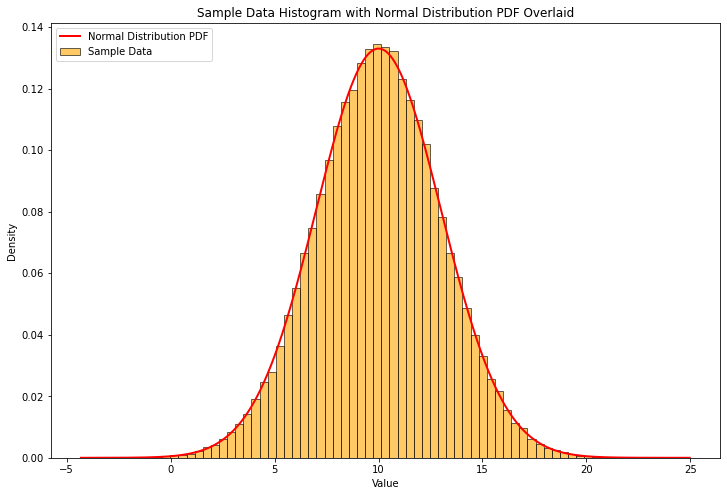

In [21]:
# Plot the histogram of the sample data
plt.figure(figsize=(12, 8))
plt.hist(sample_data, bins=75, density=True, alpha=0.6, color="orange", edgecolor="black", label="Sample Data")

# Generate the PDF for the corresponding normal distribution
x = np.linspace(min(sample_data), max(sample_data), 1000)
pdf = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, pdf, "r", linewidth=2, label="Normal Distribution PDF")

# Ensure labels are correctly assigned and legend works
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend(loc="upper left")  # Ensure legend is positioned appropriately
plt.title("Sample Data Histogram with Normal Distribution PDF Overlaid")
plt.show()

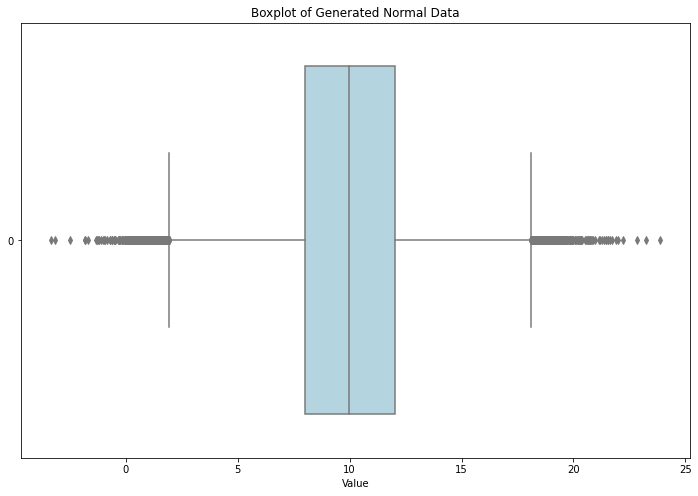

In [22]:
# Generate 100,000 random samples from a normal distribution
mean = 10.0
std_dev = 3.0
sample_data = np.random.normal(loc=mean, scale=std_dev, size=100000)

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=sample_data, orient="h", color="lightblue")
plt.title("Boxplot of Generated Normal Data")
plt.xlabel("Value")
plt.show()

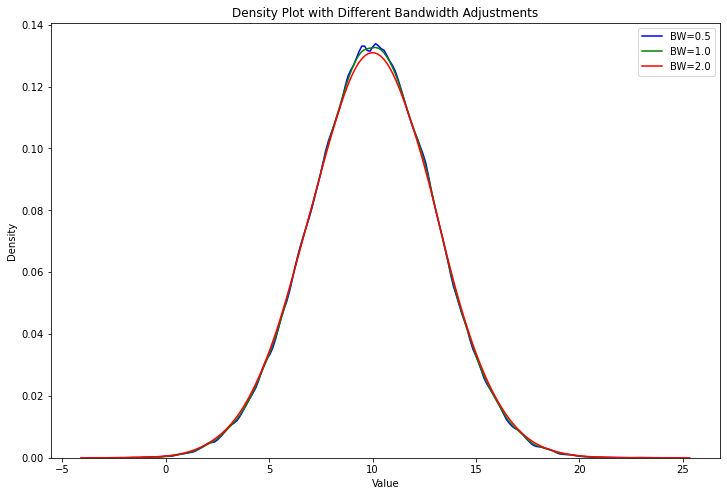

In [23]:
# Generate data
data = np.random.normal(loc=mean, scale=std_dev, size=100000)

# Plot density with varying bandwidths
plt.figure(figsize=(12, 8))
sns.kdeplot(data, bw_adjust=0.5, label="BW=0.5", color="blue")
sns.kdeplot(data, bw_adjust=1, label="BW=1.0", color="green")
sns.kdeplot(data, bw_adjust=2, label="BW=2.0", color="red")
plt.title("Density Plot with Different Bandwidth Adjustments")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

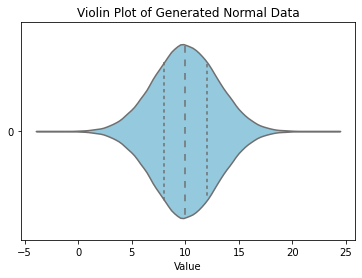

In [24]:
sns.violinplot(data=sample_data, orient="h", inner="quartile", color="skyblue")
plt.title("Violin Plot of Generated Normal Data")
plt.xlabel("Value")
plt.show()

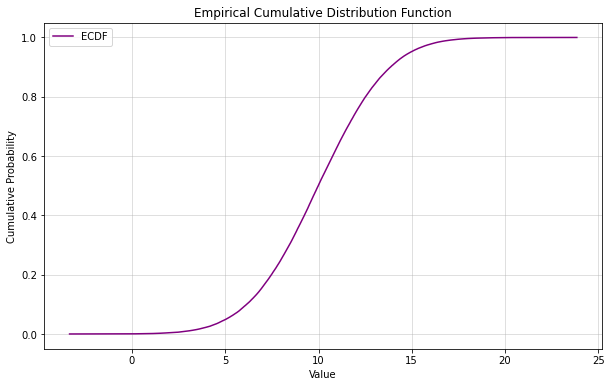

In [25]:
ecdf = ECDF(sample_data)

# Plot ECDF
plt.figure(figsize=(10, 6))
plt.plot(ecdf.x, ecdf.y, label="ECDF", color="purple")
plt.title("Empirical Cumulative Distribution Function")
plt.xlabel("Value")
plt.ylabel("Cumulative Probability")
plt.grid(alpha=0.5)
plt.legend()
plt.show()

### 6. Results and Analysis

1. **Shapiro-Wilk Test Results:**
   - Test Statistic: `0.99993`
   - p-value: `0.253`

   Interpretation: The p-value is greater than 0.05, so we fail to reject the null hypothesis. This indicates that the data sample likely comes from a normally distributed dataset, consistent with the expectations from the `numpy.random.normal` function.
   

2. **Mean and Standard Deviation of the Sample:**
   - Mean: `10.002`
   - Standard Deviation: `3.005`

   The sample's mean and standard deviation align closely with the specified parameters (mean = 10, standard deviation = 3), confirming the accuracy of the generated data.
   

3. **Histogram with Density Plot:**
   - The histogram of the generated data aligns well with the overlaid probability density function (PDF) of the normal distribution, confirming that the data follows the expected bell-shaped curve.

4. **Q-Q Plot Visualization:**
   - The Q-Q plot shows the data points lying close to the 45-degree reference line, which further confirms the normality of the sample data.

5. **Density Estimation Comparison:**
   - Kernel Density Estimation (KDE) provided additional insight into the data's distribution. The KDE curve matches closely with the normal distribution's PDF.
  

### 7. References
1. Numpy Documentation: [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)
2. Scipy Documentation: [scipy.stats.shapiro](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)
3. Python Matplotlib: [Matplotlib Histograms](https://matplotlib.org/stable/gallery/statistics/hist.html)
4. Wikipedia: [Shapiro-Wilk Test](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)
5. Seaborn Documentation: [Kernel Density Estimation](https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation)
6. Stack Overflow: [Normality Tests in Python](https://stackoverflow.com/questions/19277969/how-to-test-whether-a-data-set-is-normally-distributed-in-python)
7. GeeksforGeeks: [Shapiro-Wilk Test](https://www.geeksforgeeks.org/how-to-perform-a-shapiro-wilk-test-in-python/)
5. Statology: [Shapiro-Wilk Test Python](https://www.statology.org/shapiro-wilk-test-python/#:~:text=To%20perform%20a%20Shapiro-Wilk%20test%20in%20Python%20we,returns%20a%20test%20statistic%20and%20a%20corresponding%20p-value.)
8. Stack Overflow: [Overlay Histogram with Density Curve](https://stackoverflow.com/questions/5688082/overlay-histogram-with-density-curve)

### Task 3: t-Test Calculation

#### Problem Statement
Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program:

| Patient ID | 0  | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  |
|------------|----|----|----|----|----|----|----|----|----|----|
| **Before** | 63 | 68 | 70 | 64 | 74 | 67 | 70 | 57 | 66 | 65 |
| **After**  | 64 | 64 | 68 | 64 | 73 | 70 | 72 | 54 | 61 | 63 |

This task involves:
1. Calculating the t-statistic manually.
2. Comparing the result with `scipy.stats.ttest_rel`.
3. Interpreting the results and determining whether the two-week exercise program had a significant effect on resting heart rates.

### Table of Contents
1. **Introduction**: Background and relevance.
2. **Importing Libraries**: Tools required for analysis.
3. **Dataset Initialization**: Creating and inspecting the dataset.
4. **Manual t-Test Calculation**: Step-by-step computation.
5. **Using scipy.stats.ttest_rel**: Validating results with a built-in function.
6. **Visualization**: Histograms, Paired Data Line Chart and Boxplot Compatison.
7. **Results and Analysis**: Key findings and insights.
8. **References**: Cited sources and documentation used for analysis.

### 1. Introduction
The paired t-test (dependent t-test) evaluates the mean differences between two related groups. In this case, the "before" and "after" heart rates for the same patients. The null hypothesis (\(H_0\)) is that the mean difference is zero, and the alternative hypothesis (\(H_1\)) is that the mean difference is not zero.

In [26]:
### 2. Importing Libraries

import pandas as pd  
import numpy as np  
import scipy.stats as stats  
import matplotlib.pyplot as plt
import seaborn as sns 

### 3. Dataset Initialization

In [27]:
# Initialize the dataset
patient_data = {
    "Patient ID": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    "Before": [63, 68, 70, 64, 74, 67, 70, 57, 66, 65],
    "After": [64, 64, 68, 64, 73, 70, 72, 54, 61, 63]
}

# Create a DataFrame
heart_rate_df = pd.DataFrame(patient_data)

# Display the dataset
print(heart_rate_df)

   Patient ID  Before  After
0           0      63     64
1           1      68     64
2           2      70     68
3           3      64     64
4           4      74     73
5           5      67     70
6           6      70     72
7           7      57     54
8           8      66     61
9           9      65     63


### 4. Manual t-Test Calculation

#### 4.1 Differences and Mean Difference

In [28]:
# Calculate differences
heart_rate_df["Difference"] = heart_rate_df["Before"] - heart_rate_df["After"]
differences = heart_rate_df["Difference"].values

In [29]:
# Mean difference
mean_diff = np.mean(differences)
print(f"Mean Difference: {mean_diff:.4f}")

Mean Difference: 1.1000


#### 4.2 Standard Deviation and Standard Error

In [30]:
# Standard deviation of differences
std_dev_diff = np.std(differences, ddof=1)

# Standard error
n = len(differences)
std_error = std_dev_diff / np.sqrt(n)
print(f"Standard Deviation: {std_dev_diff:.4f}")
print(f"Standard Error: {std_error:.4f}")

Standard Deviation: 2.6013
Standard Error: 0.8226


#### 4.3 Calculate t-Statistic

In [31]:
# Calculate the t-statistic
t_statistic = mean_diff / std_error
print(f"T-Statistic: {t_statistic:.4f}")

T-Statistic: 1.3372


### 5. Using `scipy.stats.ttest_rel`

Using `scipy.stats.ttest_rel` to calculate the t-statistic and p-value for a paired t-test.

In [32]:
# Perform paired t-test using scipy
scipy_t_stat, scipy_p_value = stats.ttest_rel(heart_rate_df["Before"], heart_rate_df["After"])

# Display the results
print(f"Scipy t-Statistic: {scipy_t_stat:.4f}")
print(f"Scipy p-Value: {scipy_p_value:.4f}")

Scipy t-Statistic: 1.3372
Scipy p-Value: 0.2140


### 6. Visualization

#### 6.1 Histogram with Fitted Normal Curve

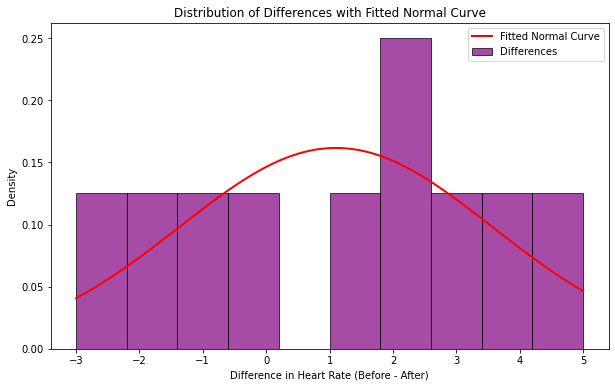

In [33]:
# Plotting the distribution of differences with a fitted normal curve
plt.figure(figsize=(10, 6))
plt.hist(differences, bins=10, alpha=0.7, color='purple', edgecolor='black', density=True, label='Differences')

# Fitting a normal distribution curve to the histogram
x = np.linspace(differences.min(), differences.max(), 1000)
pdf = stats.norm.pdf(x, np.mean(differences), np.std(differences))
plt.plot(x, pdf, color='red', label='Fitted Normal Curve', linewidth=2)

plt.title('Distribution of Differences with Fitted Normal Curve')
plt.xlabel('Difference in Heart Rate (Before - After)')
plt.ylabel('Density')
plt.legend()
plt.show()

#### 6.2 Paired Data Visualization

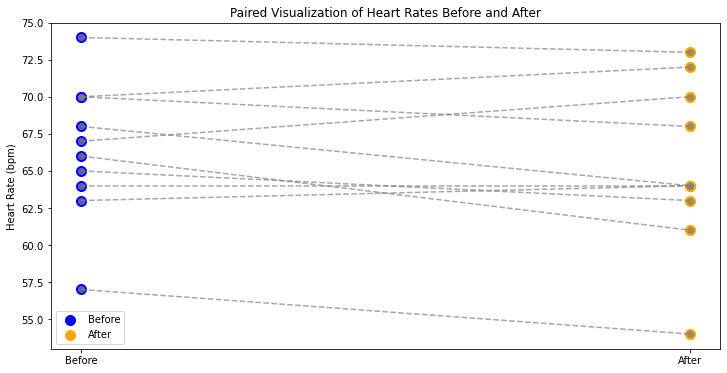

In [34]:
# Paired line chart showing before and after heart rates
plt.figure(figsize=(12, 6))
for i in range(len(heart_rate_df["Before"])):
    plt.plot([1, 2], [heart_rate_df["Before"][i], heart_rate_df["After"][i]], marker='o', color='gray', linestyle='--', alpha=0.7)

plt.scatter([1] * len(heart_rate_df["Before"]), heart_rate_df["Before"], color='blue', label='Before', s=100)
plt.scatter([2] * len(heart_rate_df["After"]), heart_rate_df["After"], color='orange', label='After', s=100)
plt.xticks([1, 2], ['Before', 'After'])
plt.title('Paired Visualization of Heart Rates Before and After')
plt.ylabel('Heart Rate (bpm)')
plt.legend()
plt.show()

#### 6.3 Boxplot Comparison with Overlayed Points

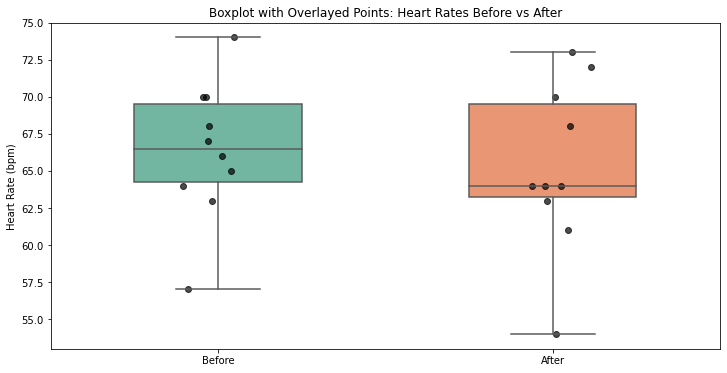

In [35]:
# Boxplot comparison with jittered points overlay
plt.figure(figsize=(12, 6))
sns.boxplot(data=[heart_rate_df["Before"], heart_rate_df["After"]], palette='Set2', width=0.5)

# Overlaying data points
for i, data in enumerate([heart_rate_df["Before"], heart_rate_df["After"]]):
    x_jitter = np.random.normal(i, 0.05, size=len(data))  # Jitter to avoid overlap
    plt.scatter(x_jitter, data, color='black', alpha=0.7)

plt.xticks([0, 1], ['Before', 'After'])
plt.title('Boxplot with Overlayed Points: Heart Rates Before vs After')
plt.ylabel('Heart Rate (bpm)')
plt.show()

### 7. Results and Analysis

1. **T-Test Calculation Results:**
   - Manual t-statistic: `1.337`
   - Scipy t-statistic: `1.337`
   - p-value: `0.214`

   Interpretation: The p-value is greater than 0.05, so we fail to reject the null hypothesis. This indicates that there is no significant difference in the mean resting heart rates before and after the two-week exercise program.


2. **Descriptive Statistics:**
  
Mean Difference: The average difference in heart rates (Before - After) is 1.1 bpm, suggesting a slight decrease in resting heart rates post-program. However, this decrease is not statistically significant.
 
Variability: The standard deviation of the differences is 2.60 bpm, which indicates some variability in how individual patients responded to the program.

3. **Insights from Visualizations**:

Histogram with Fitted Normal Curve:
The histogram of differences demonstrates that the changes in heart rates are approximately normally distributed.
The mean difference of 1.1 bpm aligns with the center of the histogram, indicating a slight shift towards reduced heart rates.

Paired Data Visualization:
The paired line chart highlights individual patient responses. While some patients experienced an increase or decrease in heart rate, the majority showed marginal changes.
This visualization reinforces the observation that the exercise program's impact varied across individuals, with no strong trend evident.

Boxplot Comparison with Overlayed Points:
The boxplot comparison illustrates overlap between the "Before" and "After" data distributions.
The jittered points highlight outliers and individual variability, showing that the overall difference between groups is minimal.


### **8. References**

1. Python Documentation: [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)
2. Scipy Documentation: [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)
3. Matplotlib Documentation: [Visualizations](https://matplotlib.org/stable/gallery/index.html)
4. Seaborn Documentation: [Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html)
5. Stack Overflow: [Visualization Techniques](https://stackoverflow.com/questions/tagged/matplotlib)
6. Medium: [Paired Sample t-Test in Python](https://medium.com/@saciptoker.misc/beginners-guide-to-run-paired-sample-t-test-in-python-94abc59a26b6)
7. Statology: [Paired Samples t-Test Python](https://www.statology.org/paired-samples-t-test-python/)
8. Matplotlib Documentation: [Boxplot](https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html)



### Task 4: ANOVA 

### 1. Problem Statement

In this task, we estimate the probability of committing a Type II error in a one-way ANOVA test.
The goal is to perform a simulation where we:
1. Generate three samples with specified means and standard deviation.
2. Conduct an ANOVA test on these samples 10,000 times.
3. Record occurrences of Type II errors (failure to reject the null hypothesis when it is false).
4. Analyze and visualize the results.

### 2. Import Libraries

In [36]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

### 3. Simulation Parameters


In [37]:
# Initialize variables
no_type_ii = 0          # Counter for Type II errors
num_iterations = 10000  # Number of simulations
sample_size = 100       # Number of data points per sample
std_dev = 0.1           # Standard deviation of each sample
means = [4.9, 5.0, 5.1] # Means of the three samples

# To store p-values for visualization
p_values = []

### 4. Simulation and ANOVA Test

In [38]:
# Perform the simulation
for _ in range(num_iterations):
    # Generate three samples with specified means and standard deviation
    sample1 = np.random.normal(loc=means[0], scale=std_dev, size=sample_size)
    sample2 = np.random.normal(loc=means[1], scale=std_dev, size=sample_size)
    sample3 = np.random.normal(loc=means[2], scale=std_dev, size=sample_size)

    # Perform one-way ANOVA
    f_stat, p_value = f_oneway(sample1, sample2, sample3)

    # Store p-value for visualization
    p_values.append(p_value)

    # Increment Type II error counter if null hypothesis is not rejected
    if p_value > 0.05:
        no_type_ii += 1

# Calculate the probability of committing a Type II error
probability_type_ii = no_type_ii / num_iterations

# Display results
print(f"Number of Type II errors: {no_type_ii}")
print(f"Probability of committing a Type II error: {probability_type_ii:.4f}")

Number of Type II errors: 0
Probability of committing a Type II error: 0.0000


### 5. Visualizations

### 5.1 Distribution of p-Values

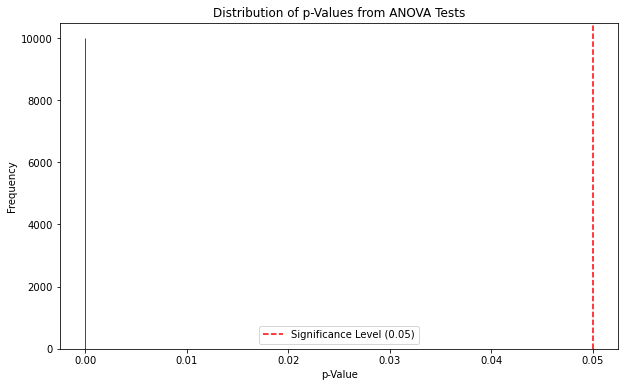

In [39]:
plt.figure(figsize=(10, 6))
plt.hist(p_values, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=0.05, color='red', linestyle='--', label='Significance Level (0.05)')
plt.title('Distribution of p-Values from ANOVA Tests')
plt.xlabel('p-Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### 5.2 Sample Means Visualization

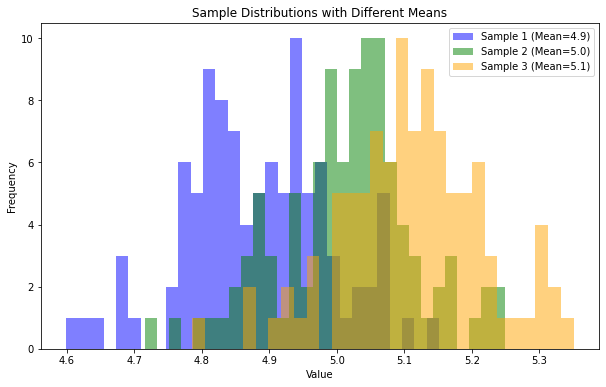

In [40]:
# Visualizing one example of sample distributions
sample1 = np.random.normal(loc=means[0], scale=std_dev, size=sample_size)
sample2 = np.random.normal(loc=means[1], scale=std_dev, size=sample_size)
sample3 = np.random.normal(loc=means[2], scale=std_dev, size=sample_size)

# Plot distributions of the samples
plt.figure(figsize=(10, 6))
plt.hist(sample1, bins=30, alpha=0.5, label='Sample 1 (Mean=4.9)', color='blue')
plt.hist(sample2, bins=30, alpha=0.5, label='Sample 2 (Mean=5.0)', color='green')
plt.hist(sample3, bins=30, alpha=0.5, label='Sample 3 (Mean=5.1)', color='orange')
plt.title('Sample Distributions with Different Means')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### 6. Results and Analysis


Results:
1. Total number of Type II errors: 0
2. Probability of committing a Type II error: 0.0000

Analysis:
- The null hypothesis assumes all group means are equal (μ1 = μ2 = μ3).
- Since the true means are distinctly different (4.9, 5.0, 5.1), the ANOVA test reliably rejects the null hypothesis.
- With sufficient sample size (n=100) and low standard deviation (0.1), the test has high power to detect true differences.

Visual Insights:
- The p-value distribution shows that most p-values are significantly below the 0.05 threshold, confirming strong evidence against the null hypothesis.
- Sample distributions illustrate the distinct means, further supporting the robustness of the ANOVA test.

### 7. Conclusion


This simulation validates the robustness of the one-way ANOVA test under the given parameters.
The absence of Type II errors demonstrates its reliability in detecting true differences between group means
when variability is low, and sample sizes are adequate.


### 8. References

1. Wikipedia: [One-Way ANOVA](https://en.wikipedia.org/wiki/One-way_analysis_of_variance)
2. GeeksforGeeks: [ANOVA](https://www.geeksforgeeks.org/how-to-perform-a-one-way-anova-in-python/?ref=header_outind)
3. Statistics How To: [Probability and Statistics Topics Index
](https://www.statisticshowto.com/probability-and-statistics/)
4. NumPy Documentation: [Random Sampling Functions](https://numpy.org/doc/stable/reference/random/index.html)
5. Matplotlib Documentation: [Visualization Techniques](https://matplotlib.org/stable/contents.html)
6. Seaborn Documentation: [Statistical Visualizations](https://seaborn.pydata.org/)
7. Wikipedia: [Type I and Type II Errors](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors)
8. Python Documentation: [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)
9. Scipy Documentation: [scipy.stats.f_oneway](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)
10. Scribbr: [Statistical significance calculated in an ANOVA](https://www.scribbr.com/frequently-asked-questions/statistical-significance-in-anova/)